In [19]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from BaseFunctions import MakeBoxPlotsSeaborn, makeHistogramSeaborn

# Dataset info

In [2]:
tlist = pd.read_csv('./Dataset/target_list.tsv', sep='\t', index_col='chembl_tid')

tlist['threshold'] = 0
for tname in tlist.index:
    df    = pd.read_csv('./Dataset/Data/%s.tsv'%tname, sep='\t', index_col=0)
    thres = df['thres'].iloc[0]
    tlist.loc[tname, 'thres'] = thres
    
axv_stats = pd.read_csv('./Dataset/Stats/axv.tsv', sep='\t', index_col=0)
used_targets = np.unique([s.split('-')[0] for s in axv_stats.index])
tlist = tlist.loc[used_targets]

In [3]:
tlist.head()

,Unnamed: 0,entry,entry_name,protein_names,protein_families,organism,ec_number,gene_names(primary),gene_ontology(molecular_function),primary_name,#mmp,#mms,machine1,machine2,predictable_trtssplit,threshold,thres
chembl_tid,,,,,,,,,,,,,,,,,
CHEMBL1075323,22,P14625,ENPL_HUMAN,Endoplasmin (94 kDa glucose-regulated protein)...,Heat shock protein 90 family,Homo sapiens (Human),NaN,HSP90B1,ATP binding [GO:0005524]; calcium ion binding ...,Endoplasmin,672,4,True,False,True,0,1.112321
CHEMBL1800,41,P34998,CRFR1_HUMAN,Corticotropin-releasing factor receptor 1 (CRF...,G-protein coupled receptor 2 family,Homo sapiens (Human),NaN,CRHR1,corticotrophin-releasing factor receptor activ...,Corticotropin-releasing factor receptor 1,361,34,False,True,True,0,2.065648
CHEMBL1862,42,P00519,ABL1_HUMAN,Tyrosine-protein kinase ABL1 (EC 2.7.10.2) (Ab...,"Protein kinase superfamily, Tyr protein kinase...",Homo sapiens (Human),2.7.10.2,ABL1,actin filament binding [GO:0051015]; actin mon...,Tyrosine-protein kinase ABL1,355,43,True,False,True,0,1.808464
CHEMBL1902,31,P62942,FKB1A_HUMAN,Peptidyl-prolyl cis-trans isomerase FKBP1A (PP...,"FKBP-type PPIase family, FKBP1 subfamily",Homo sapiens (Human),5.2.1.8,FKBP1A,activin binding [GO:0048185]; FK506 binding [G...,Peptidyl-prolyl cis-trans isomerase FKBP1A,463,11,False,True,True,0,1.313816
CHEMBL2034,28,P04150,GCR_HUMAN,Glucocorticoid receptor (GR) (Nuclear receptor...,"Nuclear hormone receptor family, NR3 subfamily",Homo sapiens (Human),NaN,NR3C1,core promoter sequence-specific DNA binding [G...,Glucocorticoid receptor,554,58,True,False,True,0,0.998438


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


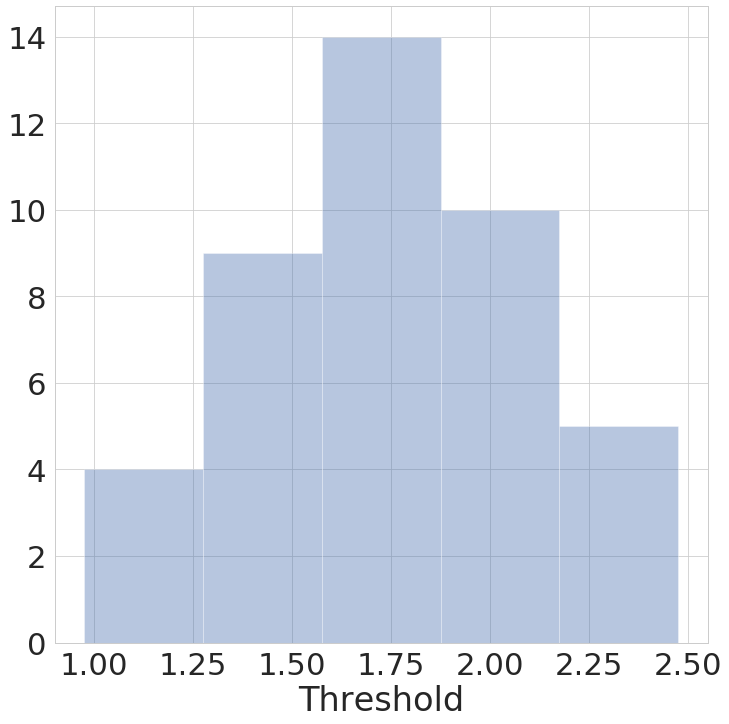

In [4]:
makeHistogramSeaborn(pd_table  = tlist,
                           xname     = 'thres',
                           hue_col   = None,
                           normalize = False,
                           label_name= 'Threshold'
                           )

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


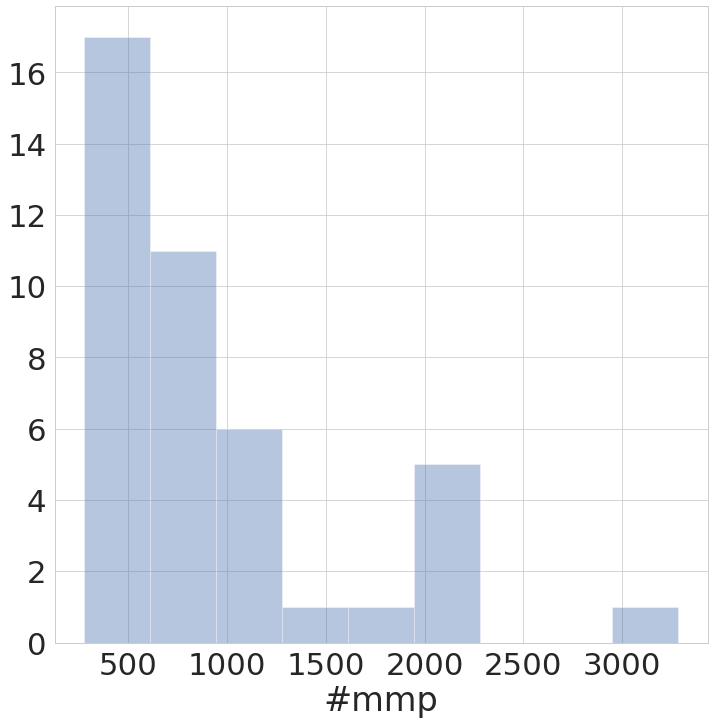

In [5]:
makeHistogramSeaborn(pd_table  = tlist,
                           xname     = '#mmp',
                           hue_col   = None,
                           normalize = False,
                           )

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


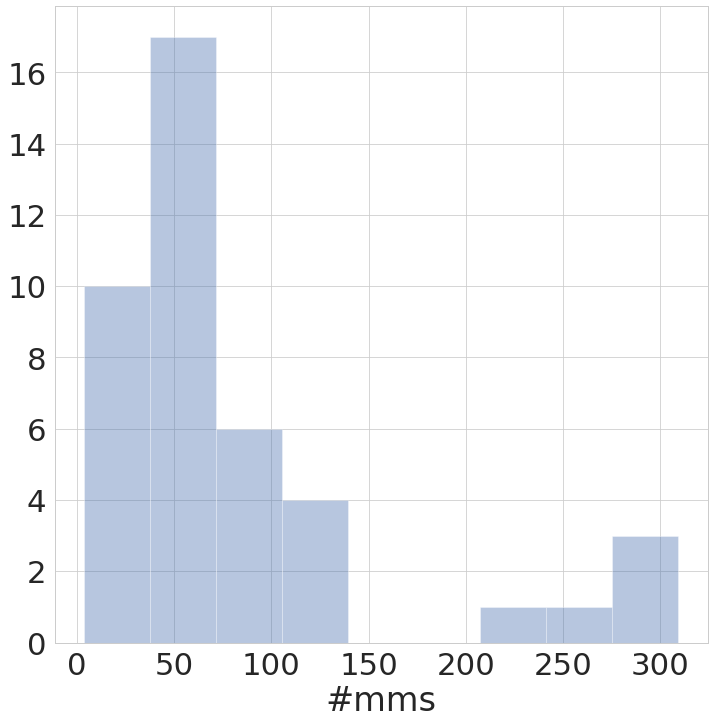

In [6]:
makeHistogramSeaborn(pd_table  = tlist,
                           xname     = '#mms',
                           hue_col   = None,
                           normalize = False,
                           )

In [3]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table

# Cpdout

In [9]:
type = 'cpdout'

svm     = pd.read_csv('./Score_axv/SVM/mean_%s.tsv'%type, sep='\t', index_col=0)
xgb     = pd.read_csv('./Score_axv/XGBoost/mean_%s.tsv'%type, sep='\t', index_col=0)
rf      = pd.read_csv('./Score_axv/Random_Forest/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn     = pd.read_csv('./Score_axv/FCNN/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn_sep = pd.read_csv('./Score_axv/FCNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
mpn     = pd.read_csv('./Score_axv/MPNN/mean_%s.tsv'%type, sep='\t', index_col=0)
mpn_sep = pd.read_csv('./Score_axv/MPNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
nn1     = pd.read_csv('./Score_axv/1NN/mean_%s.tsv'%type, sep='\t', index_col=0)
nn5     = pd.read_csv('./Score_axv/5NN/mean_%s.tsv'%type, sep='\t', index_col=0)


svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


svm['model']     = 'svm'
xgb['model']     = 'xgb'
rf['model']      = 'rf'
fcn['model']     = 'fcnn'
fcn_sep['model'] = 'fcnn_sep'
mpn['model']     = 'mpnn'
mpn_sep['model'] = 'mpnn_sep'
nn1['model']     = '1NN'
nn5['model']     = '5NN'


all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])


In [9]:
all_score.head()

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model
CHEMBL1075323,0.936,0.611,0.137,0.224,0.774,0.268,461.333,15.333,0.0,0.009,0.000,0.000,0.010,0.002,7297.333,10.333,1.112321,3.0,svm
CHEMBL1800,0.979,0.900,0.847,0.870,0.954,0.861,243.333,10.333,0.0,0.030,0.004,0.013,0.000,0.016,122.333,0.333,2.065648,33.0,svm
CHEMBL1862,0.914,0.178,0.089,0.112,0.652,0.096,228.333,11.667,0.0,0.028,0.007,0.010,0.013,0.007,162.333,4.333,1.808464,42.0,svm
CHEMBL1902,0.910,0.133,0.056,0.078,0.666,0.045,280.000,11.333,0.0,0.053,0.009,0.018,0.006,0.023,372.000,0.333,1.313816,10.0,svm
CHEMBL2034,0.930,0.375,0.381,0.371,0.807,0.338,327.667,19.000,0.0,0.047,0.063,0.048,0.015,0.047,302.333,12.000,0.998438,57.0,svm


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamur

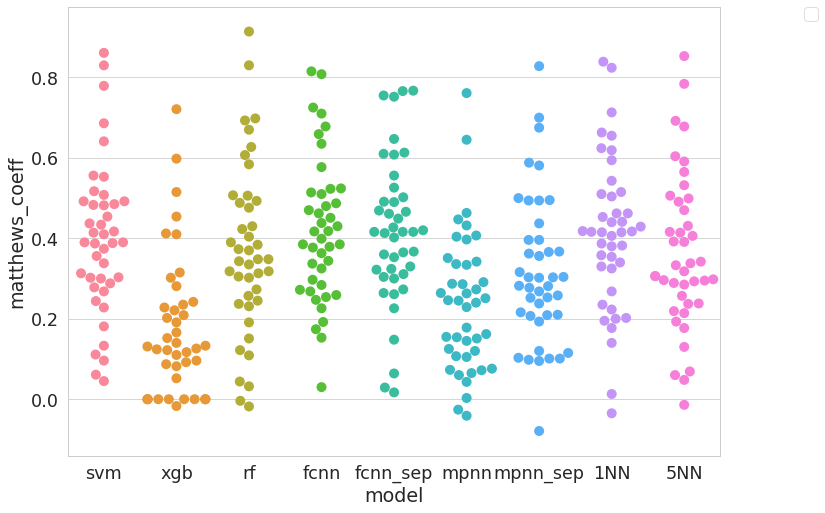

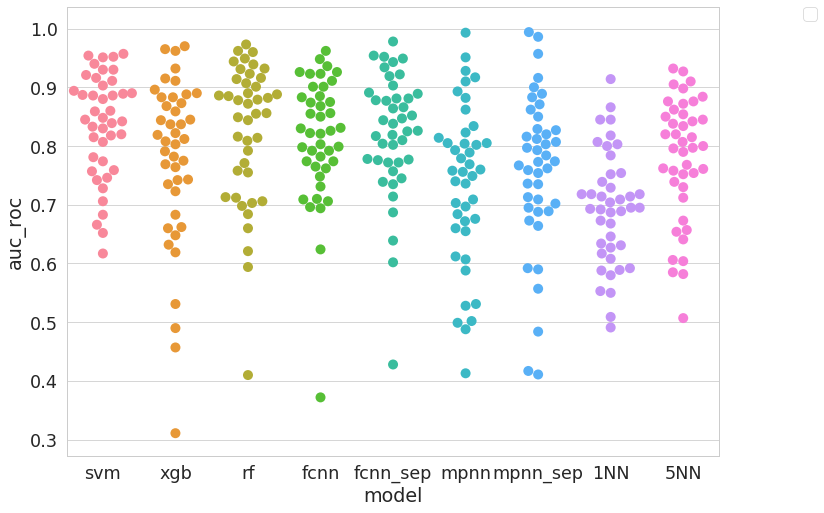

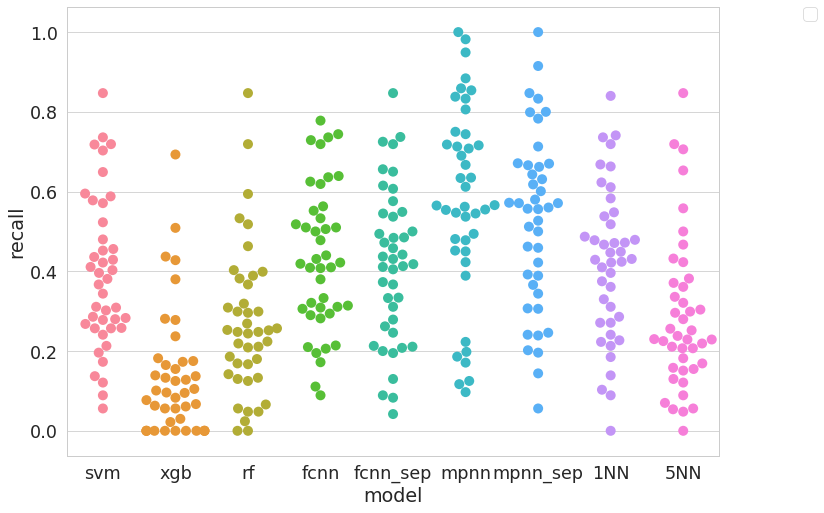

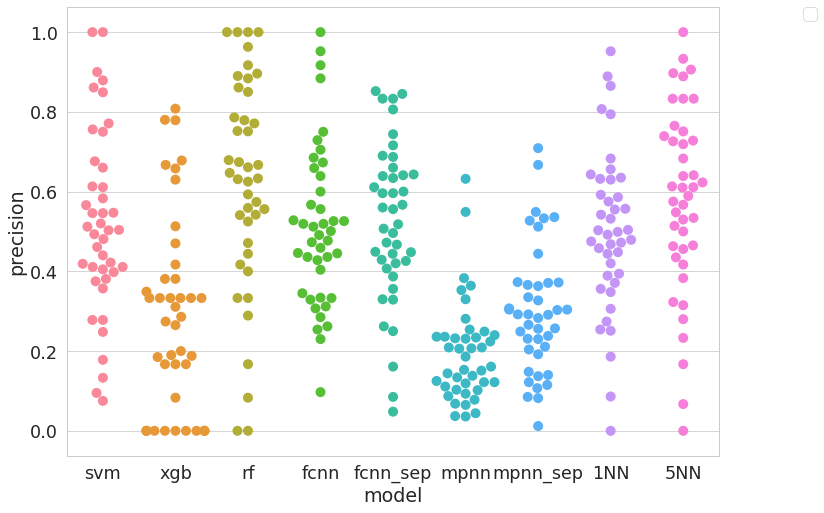

In [10]:
os.makedirs('./Score_axv/swarm_performance_%s/' %(type), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = True,
                            )
    plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s.png' %(type, metric))

/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with

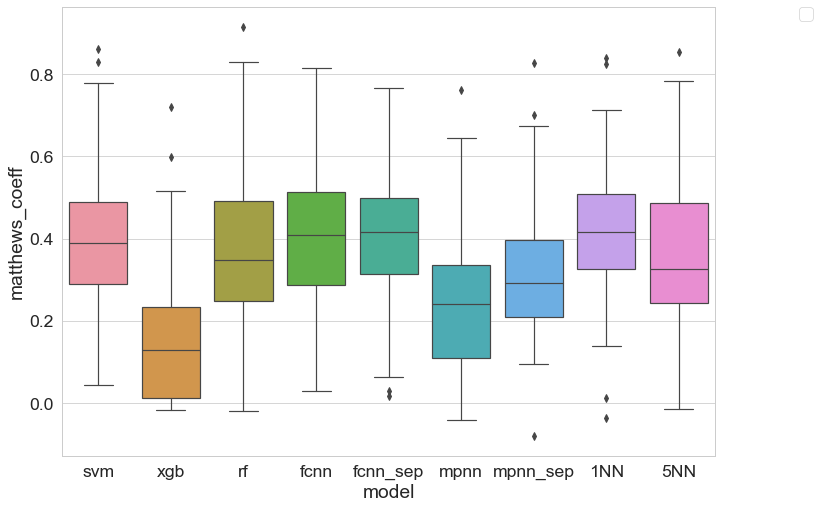

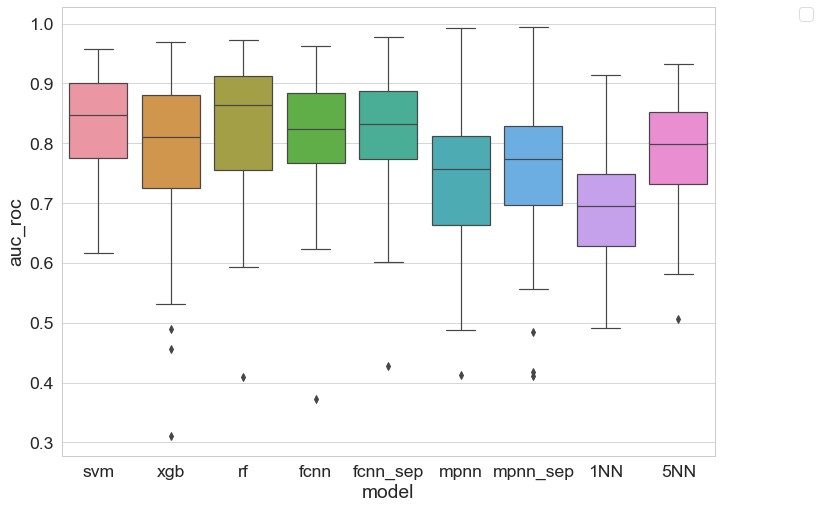

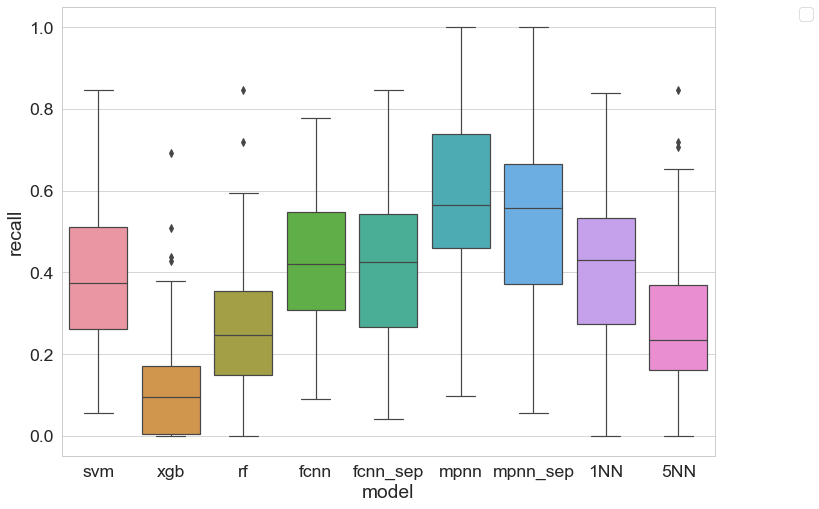

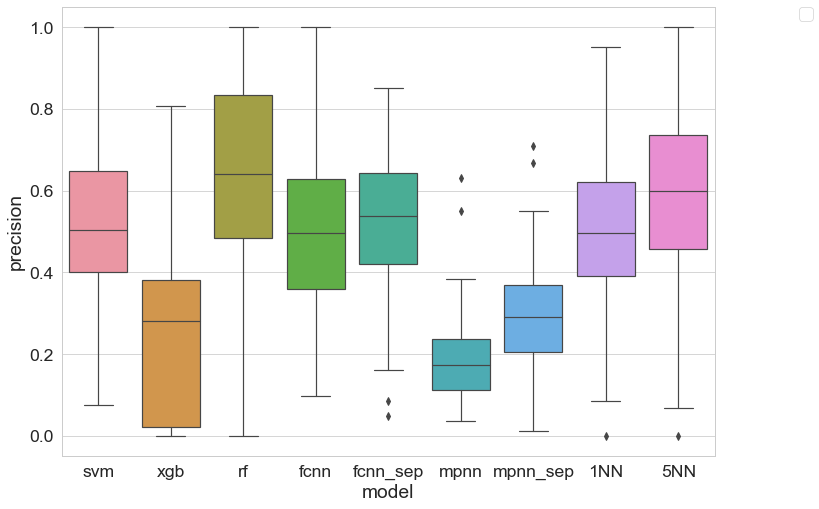

In [6]:
os.makedirs('./Score_axv/swarm_performance_%s/' %(type), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = False,
                            )
    plt.savefig('./Score_axv/swarm_performance_%s/bar_%s.png' %(type, metric))

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/min

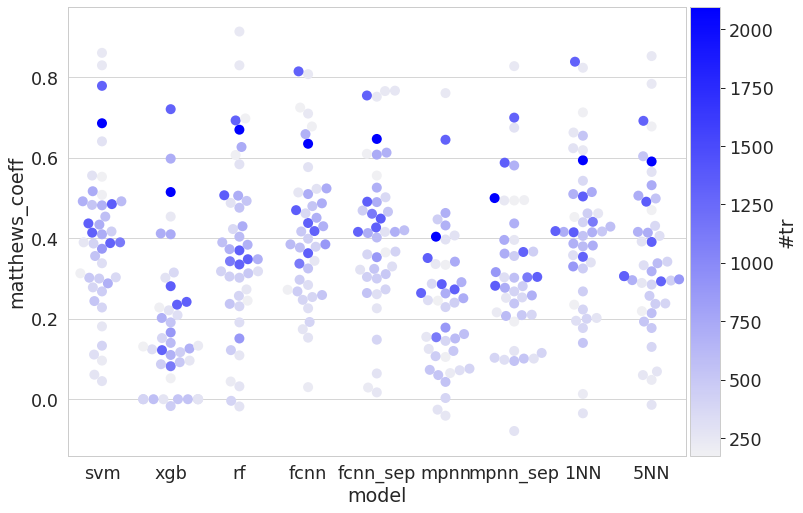

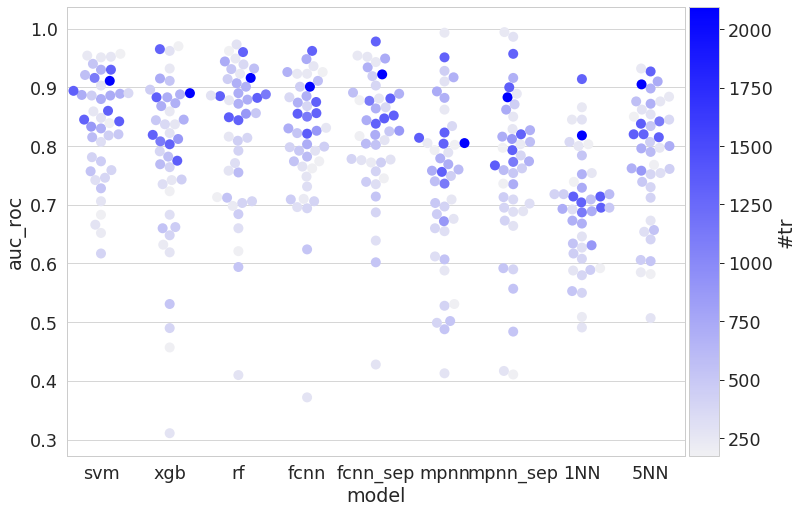

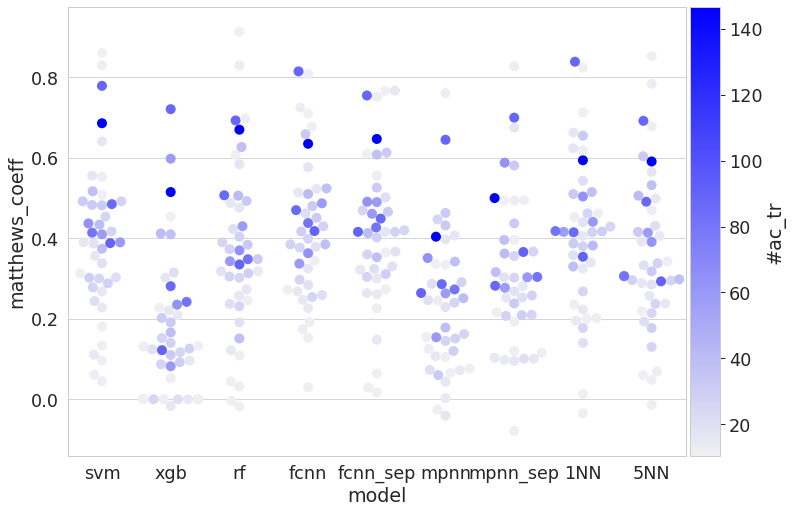

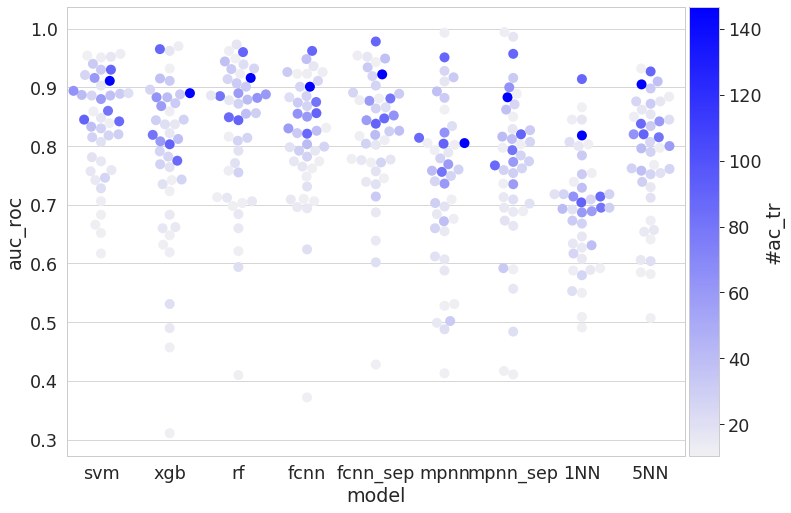

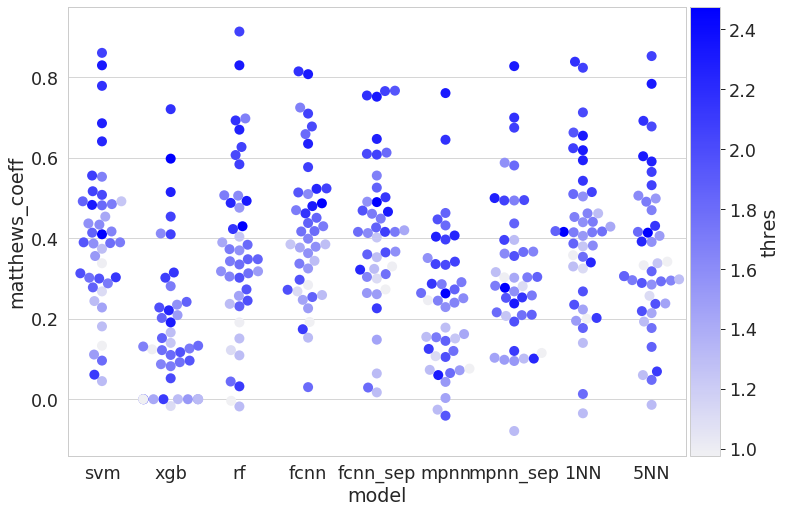

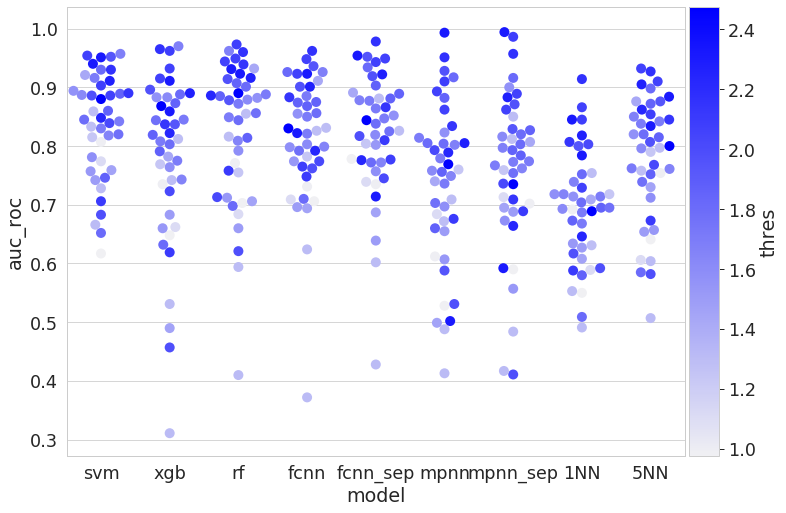

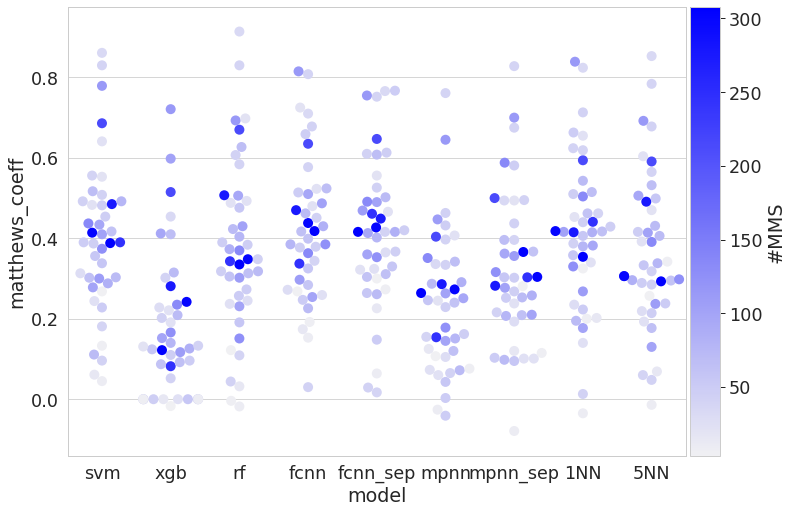

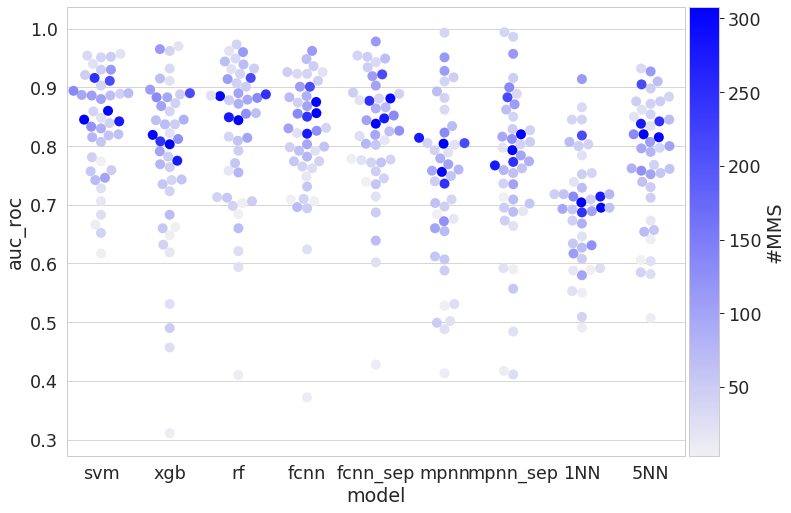

In [11]:
import seaborn as sns
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(11.7, 8.27))

        ax      = sns.swarmplot(x='model', y=metric, hue=color_col, data=all_score, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s_color_%s.png' %(type, metric, color_col))


In [14]:
all_score

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model
CHEMBL1075323,0.936,0.611,0.137,0.224,0.774,0.268,461.333,15.333,0.000,0.009,0.000,0.000,0.010,0.002,7297.333,10.333,1.112321,3.0,svm
CHEMBL1800,0.979,0.900,0.847,0.870,0.954,0.861,243.333,10.333,0.000,0.030,0.004,0.013,0.000,0.016,122.333,0.333,2.065648,33.0,svm
CHEMBL1862,0.914,0.178,0.089,0.112,0.652,0.096,228.333,11.667,0.000,0.028,0.007,0.010,0.013,0.007,162.333,4.333,1.808464,42.0,svm
CHEMBL1902,0.910,0.133,0.056,0.078,0.666,0.045,280.000,11.333,0.000,0.053,0.009,0.018,0.006,0.023,372.000,0.333,1.313816,10.0,svm
CHEMBL2034,0.930,0.375,0.381,0.371,0.807,0.338,327.667,19.000,0.000,0.047,0.063,0.048,0.015,0.047,302.333,12.000,0.998438,57.0,svm
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL3991,0.948,0.906,0.432,0.584,0.834,0.604,522.000,32.333,0.000,0.008,0.000,0.001,0.003,0.001,27.000,6.333,2.308713,23.0,5NN
CHEMBL4072,0.965,1.000,0.500,0.636,0.768,0.678,188.667,11.667,0.000,0.000,0.083,0.056,0.038,0.040,58.333,0.333,2.020320,42.0,5NN
CHEMBL4409,0.906,0.233,0.054,0.083,0.673,0.069,275.333,12.667,0.001,0.063,0.002,0.005,0.017,0.009,430.333,14.333,2.108148,15.0,5NN
CHEMBL4523,0.969,0.897,0.719,0.791,0.884,0.784,243.333,12.667,0.001,0.008,0.060,0.033,0.010,0.035,82.333,14.333,2.312472,39.0,5NN


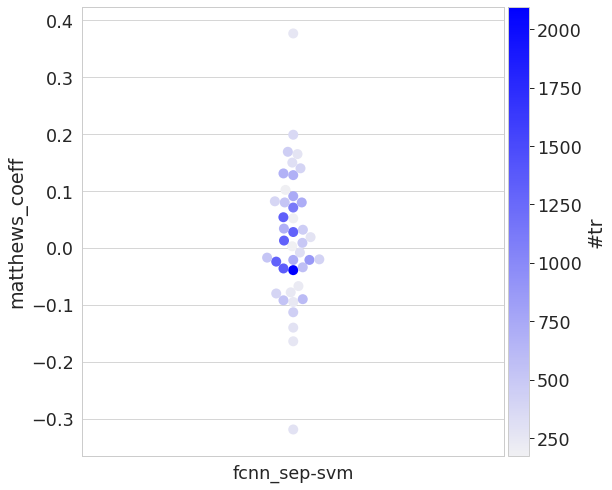

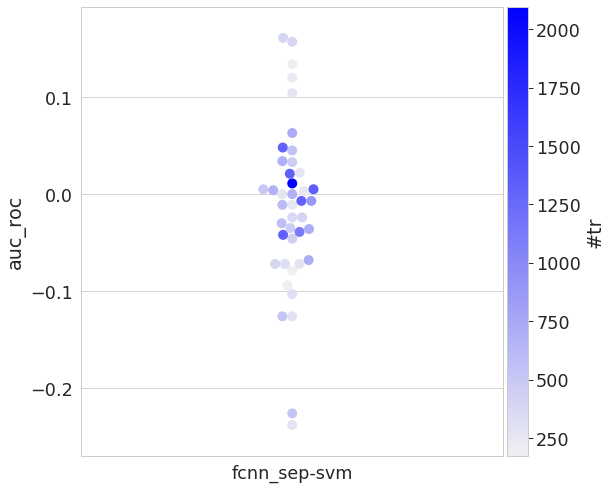

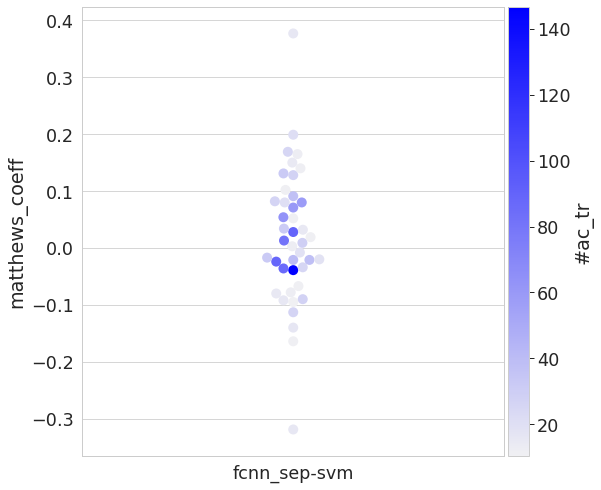

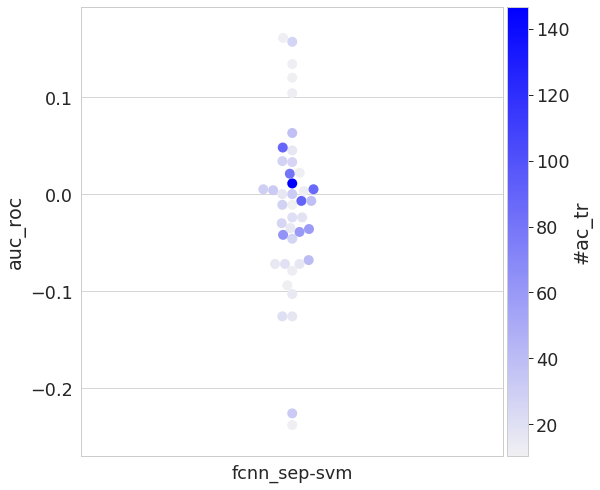

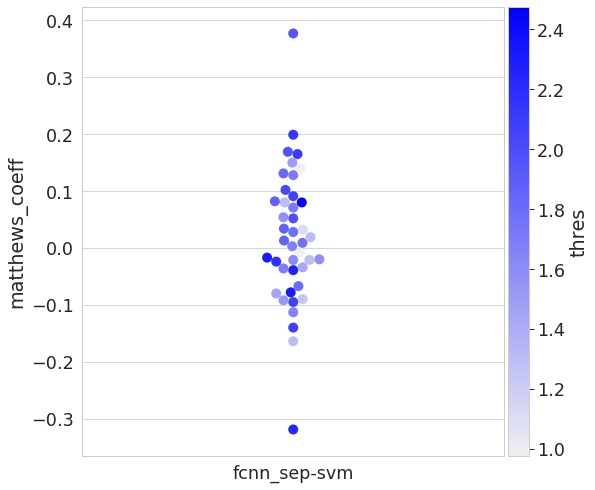

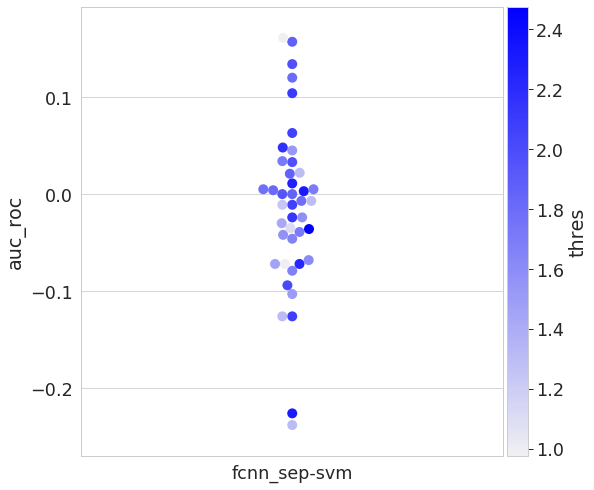

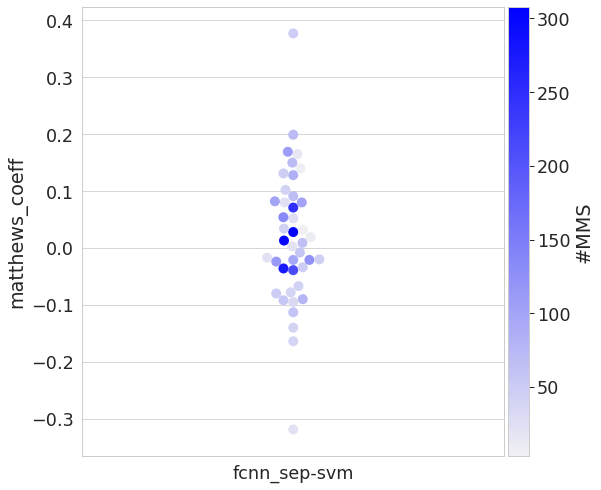

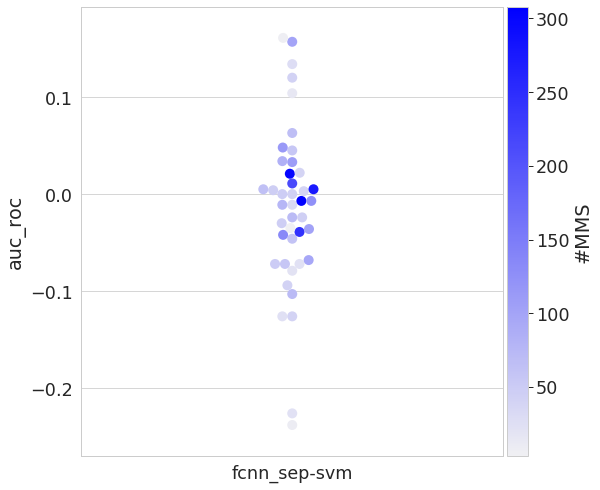

In [12]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_fcn_svm = fcn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['fcnn_sep-svm']*svm.shape[0], y=d_fcn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_(fcnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))

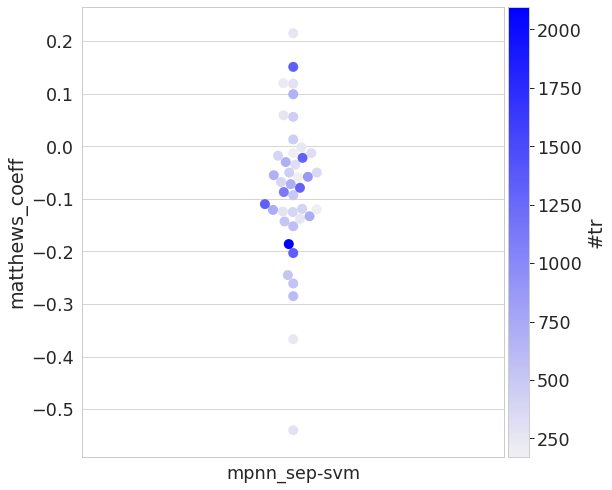

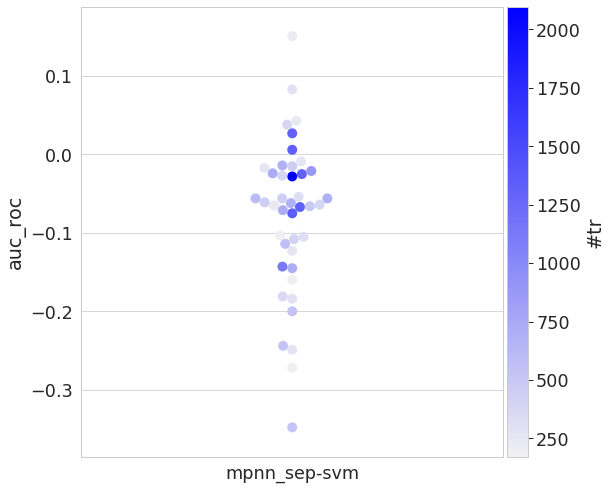

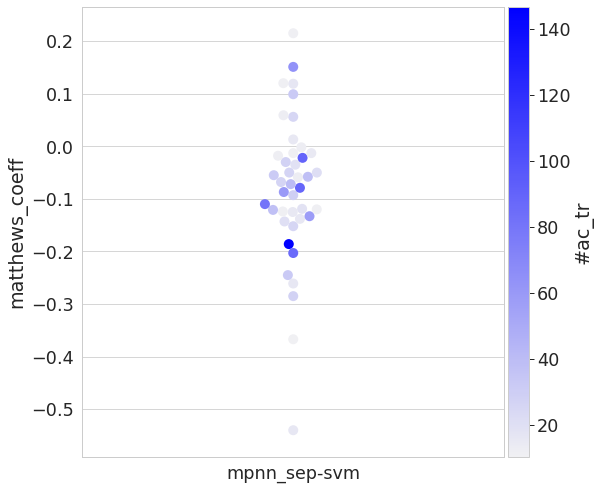

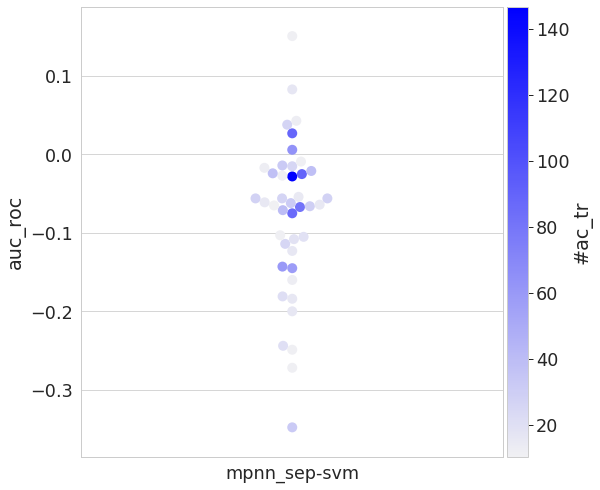

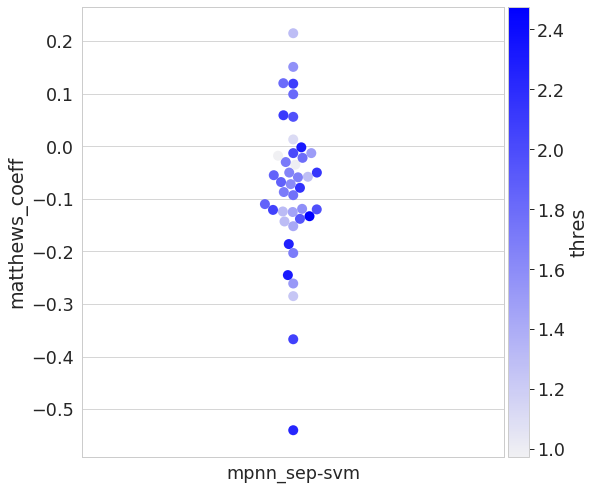

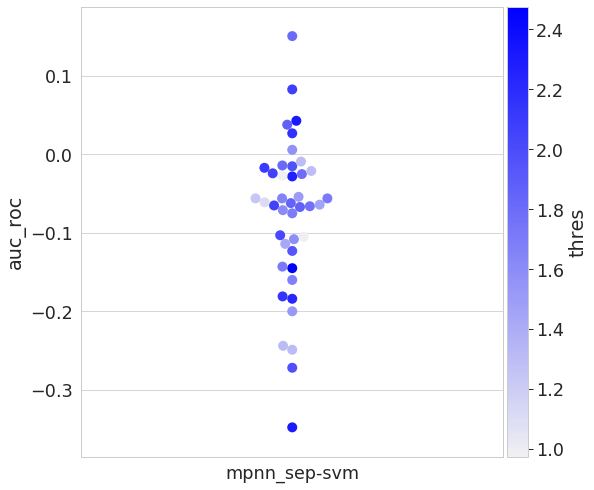

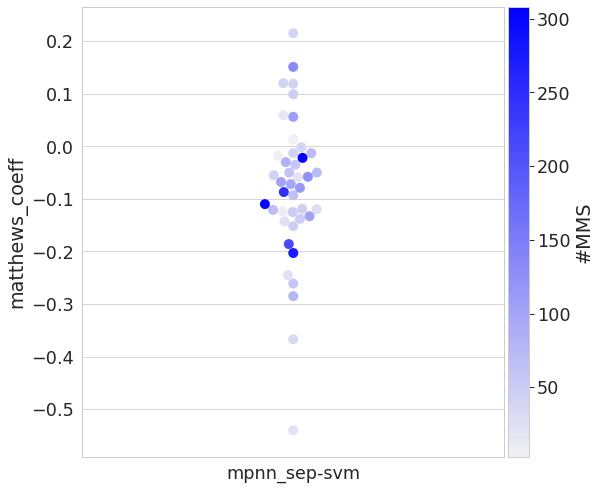

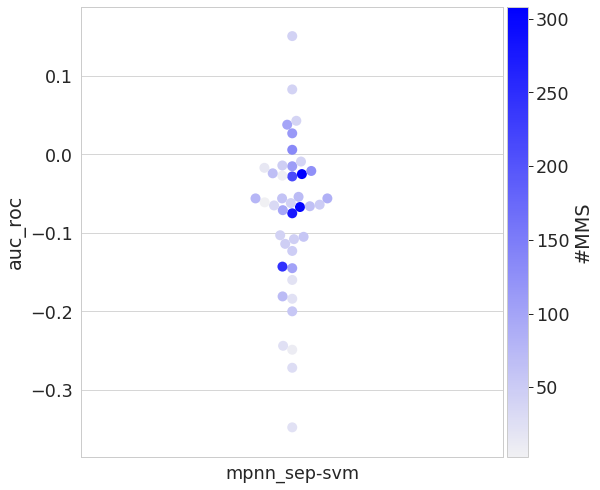

In [14]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_mpn_svm = mpn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['mpnn_sep-svm']*svm.shape[0], y=d_mpn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_(mpnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))

In [17]:
diff_fcnn_svm = fcn.copy()
diff_fcnn_svm['d_mcc'] = fcn['matthews_coeff'] - svm['matthews_coeff']
diff_fcnn_svm.sort_values('d_mcc', ascending=False).head(10)

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model,d_mcc
CHEMBL237,0.944,0.659,0.729,0.685,0.926,0.659,676.333,32.333,0.002,0.011,0.015,0.006,0.005,0.010,608.333,174.333,1.816195,47.0,fcnn,0.177
CHEMBL335,0.962,0.750,0.744,0.743,0.926,0.725,172.667,12.667,0.001,0.062,0.013,0.034,0.004,0.041,97.333,4.333,1.677741,22.0,fcnn,0.172
CHEMBL4072,0.965,1.000,0.500,0.636,0.774,0.678,188.667,11.667,0.000,0.000,0.083,0.056,0.045,0.040,58.333,0.333,2.020320,42.0,fcnn,0.170
CHEMBL222,0.927,0.334,0.440,0.375,0.831,0.344,256.667,11.667,0.000,0.023,0.092,0.044,0.003,0.049,281.333,0.333,1.299836,39.0,fcnn,0.163
CHEMBL218,0.925,0.501,0.518,0.490,0.883,0.462,367.000,21.333,0.000,0.020,0.047,0.017,0.003,0.020,199.000,12.333,2.142581,72.0,fcnn,0.159
CHEMBL251,0.905,0.436,0.533,0.479,0.885,0.430,689.333,27.667,0.000,0.002,0.008,0.004,0.001,0.005,1962.333,30.333,1.715372,85.0,fcnn,0.142
CHEMBL3729,0.924,0.639,0.510,0.527,0.936,0.514,255.667,15.667,0.004,0.120,0.181,0.140,0.003,0.152,24.333,2.333,1.947427,49.0,fcnn,0.124
CHEMBL256,0.922,0.512,0.410,0.455,0.792,0.417,499.667,29.000,0.000,0.025,0.017,0.019,0.011,0.022,174.333,3.000,1.773622,64.0,fcnn,0.115
CHEMBL267,0.926,0.230,0.311,0.255,0.696,0.226,308.000,14.667,0.001,0.005,0.010,0.005,0.013,0.006,333.000,6.333,1.506356,72.0,fcnn,0.115
CHEMBL4409,0.891,0.262,0.210,0.228,0.748,0.174,275.333,12.667,0.002,0.078,0.035,0.048,0.045,0.049,430.333,14.333,2.108148,15.0,fcnn,0.113


# Bothout

In [16]:
type = 'bothout'

svm     = pd.read_csv('./Score_axv/SVM/mean_%s.tsv'%type, sep='\t', index_col=0)
xgb     = pd.read_csv('./Score_axv/XGBoost/mean_%s.tsv'%type, sep='\t', index_col=0)
rf      = pd.read_csv('./Score_axv/Random_Forest/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn     = pd.read_csv('./Score_axv/FCNN/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn_sep = pd.read_csv('./Score_axv/FCNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
mpn     = pd.read_csv('./Score_axv/MPNN/mean_%s.tsv'%type, sep='\t', index_col=0)
mpn_sep = pd.read_csv('./Score_axv/MPNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
nn1     = pd.read_csv('./Score_axv/1NN/mean_%s.tsv'%type, sep='\t', index_col=0)
nn5     = pd.read_csv('./Score_axv/5NN/mean_%s.tsv'%type, sep='\t', index_col=0)


svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


svm['model']     = 'svm'
xgb['model']     = 'xgb'
rf['model']      = 'rf'
fcn['model']     = 'fcnn'
fcn_sep['model'] = 'fcnn_sep'
mpn['model']     = 'mpnn'
mpn_sep['model'] = 'mpnn_sep'
nn1['model']     = '1NN'
nn5['model']     = '5NN'


all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

16.7% of the points cannot be placed;

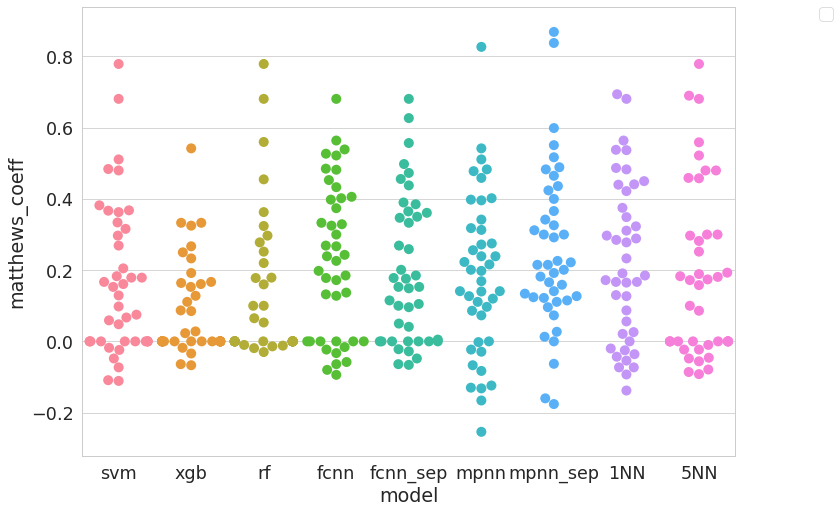

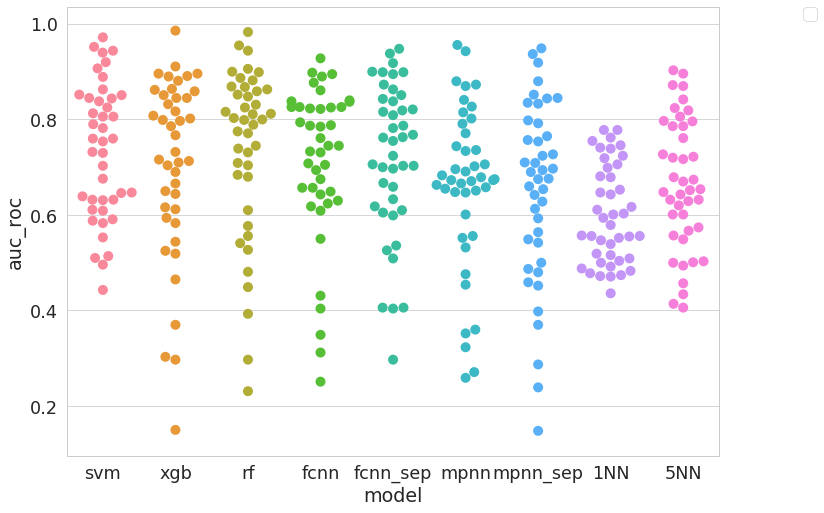

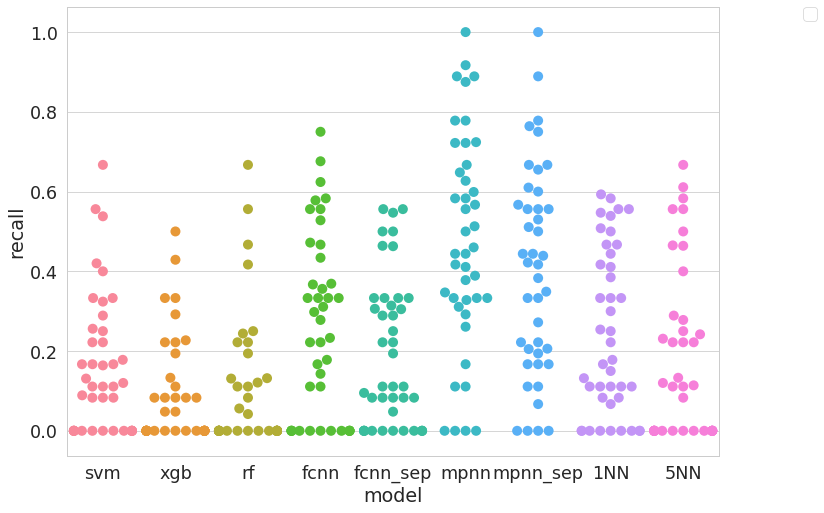

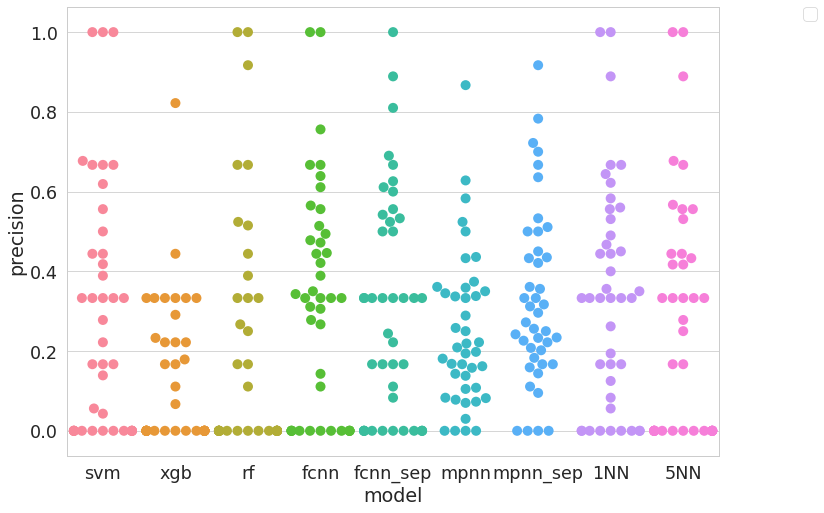

In [22]:
os.makedirs('./Score_axv/swarm_performance_%s/' %(type), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = True,
                            )
    plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s.png' %(type, metric))

/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/Users/tamura/miniconda3/envs/rdkit_torch/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with

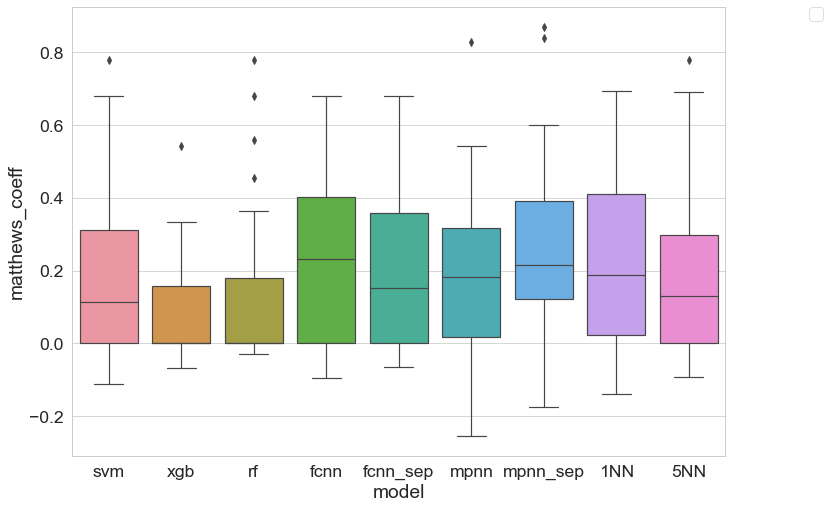

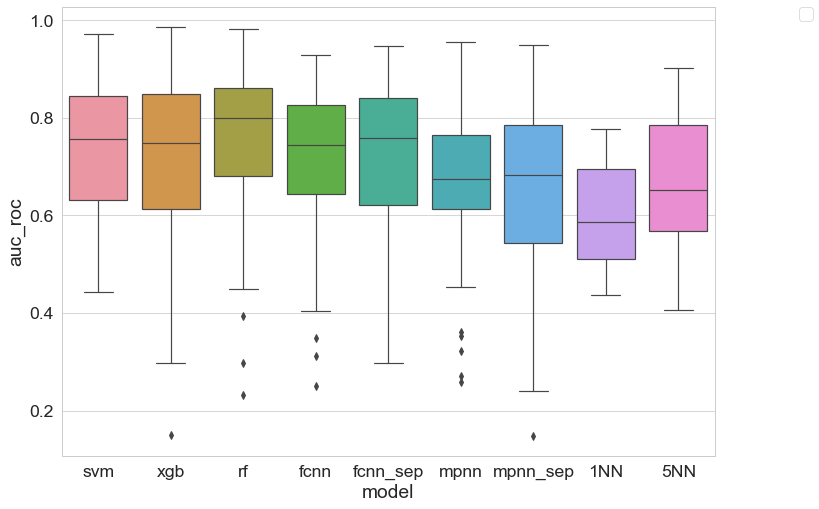

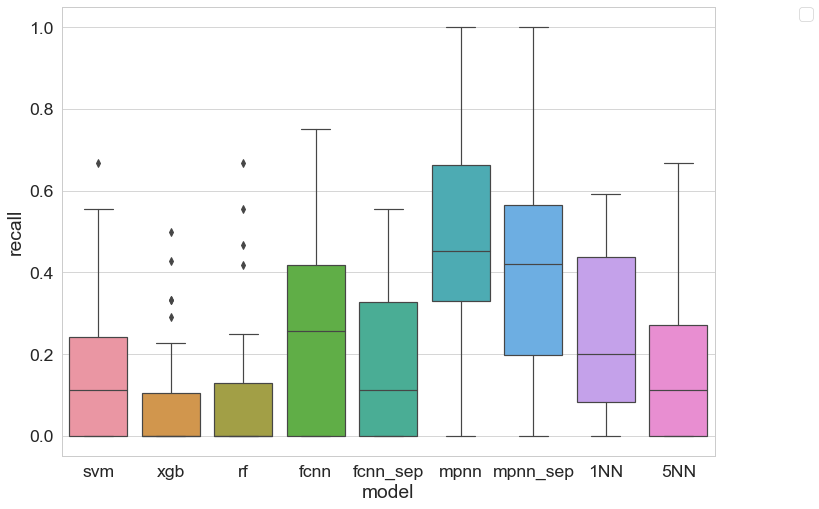

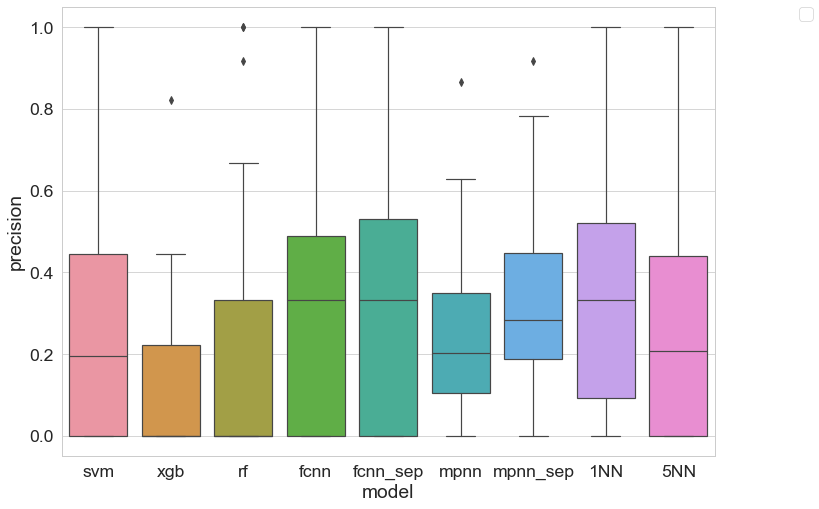

In [8]:
os.makedirs('./Score_axv/swarm_performance_%s/' %(type), exist_ok=True)

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = False,
                            )
    plt.savefig('./Score_axv/swarm_performance_%s/bar_%s.png' %(type, metric))

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

35.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

7.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning:

16.7% of the points cannot be placed;

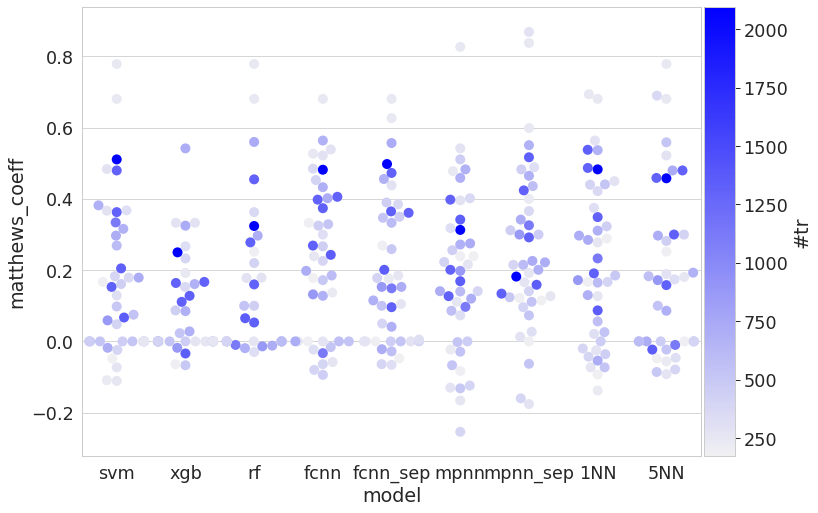

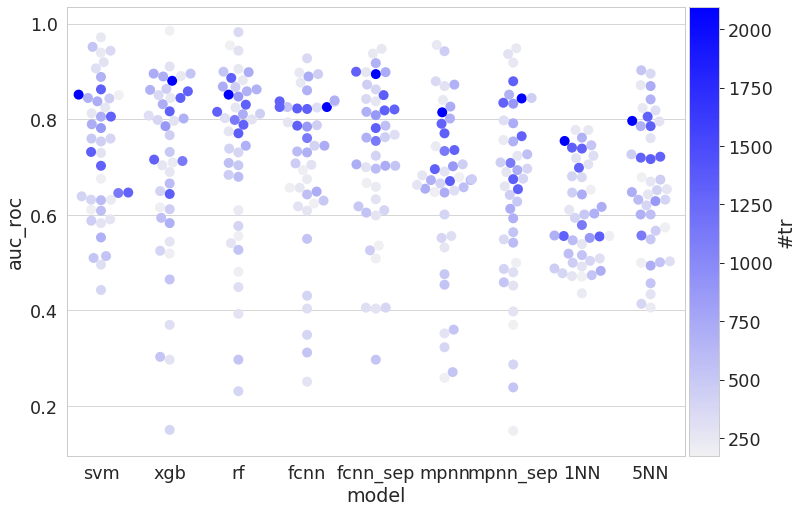

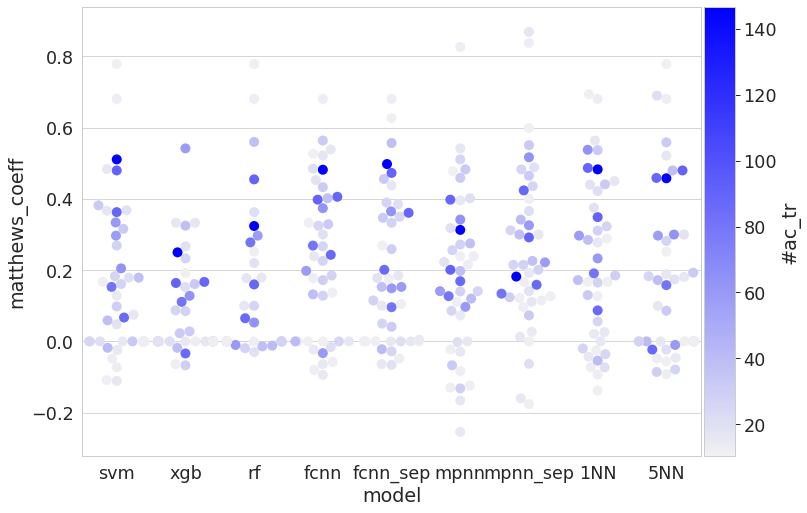

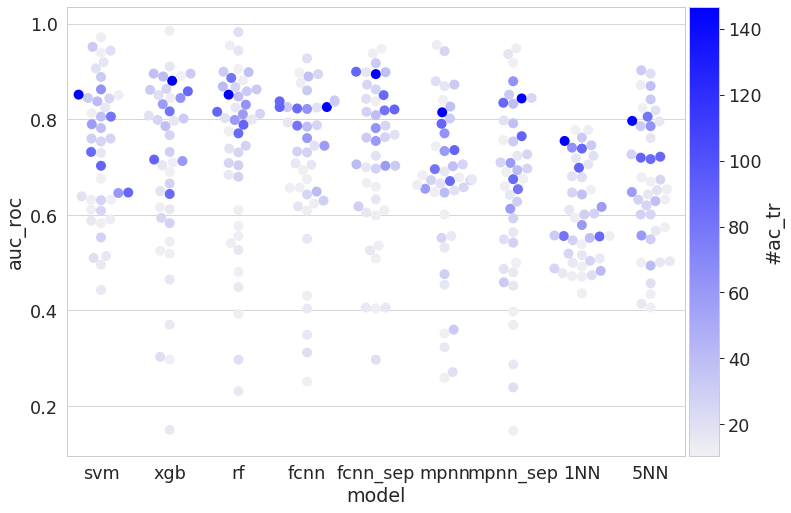

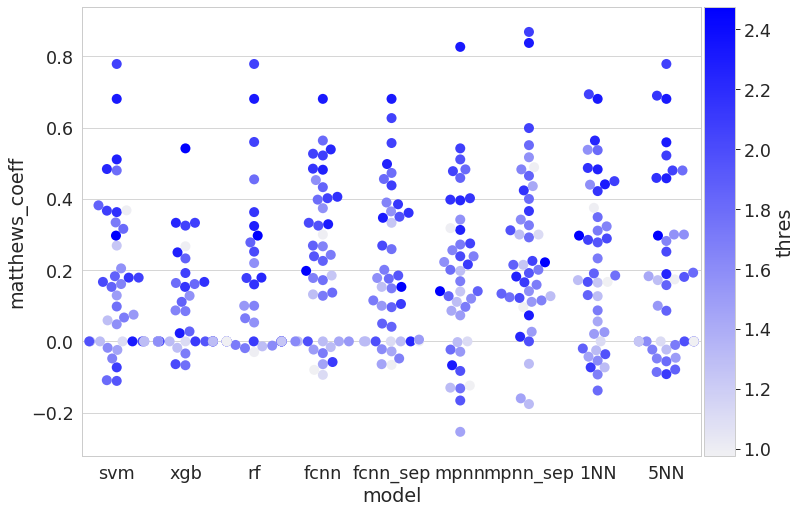

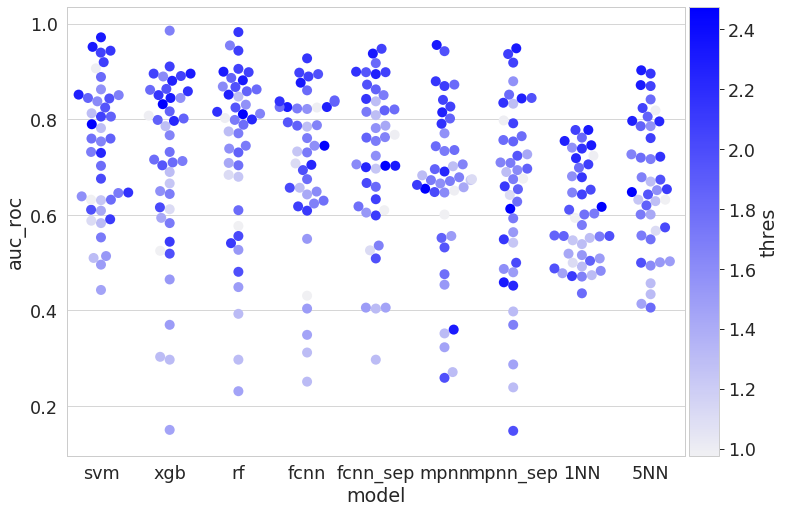

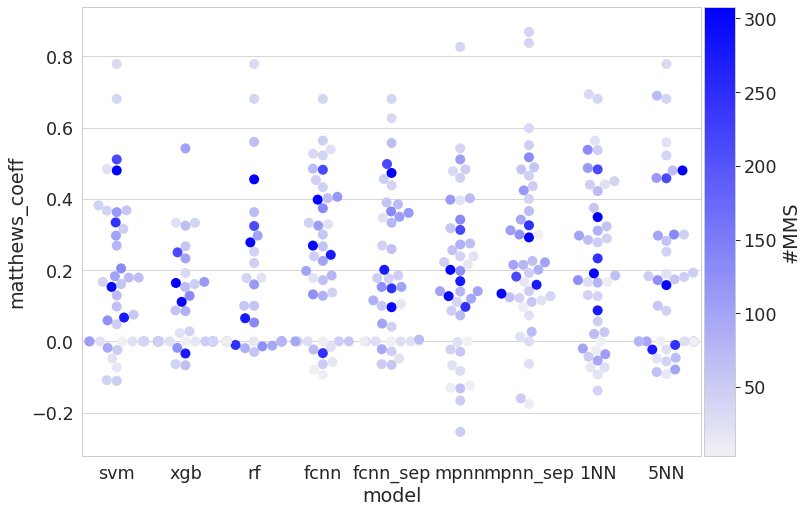

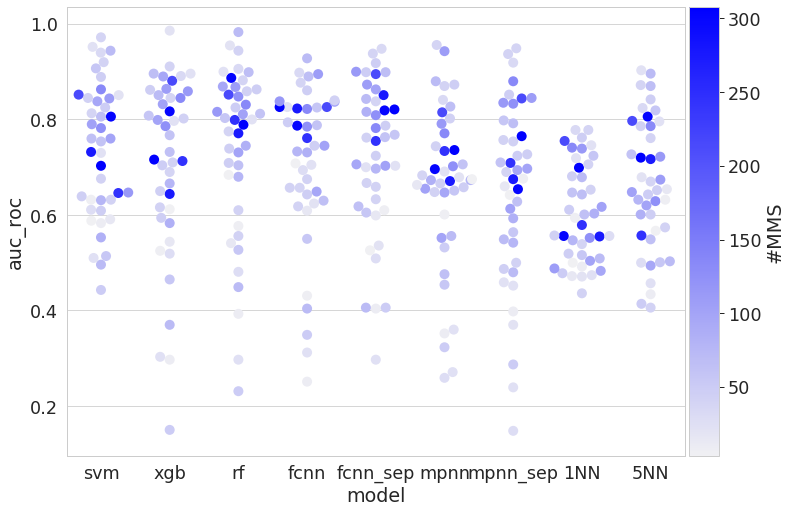

In [23]:
import seaborn as sns
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(11.7, 8.27))

        ax      = sns.swarmplot(x='model', y=metric, hue=color_col, data=all_score, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s_color_%s.png' %(type, metric, color_col))


NameError: name 'make_axes_locatable' is not defined

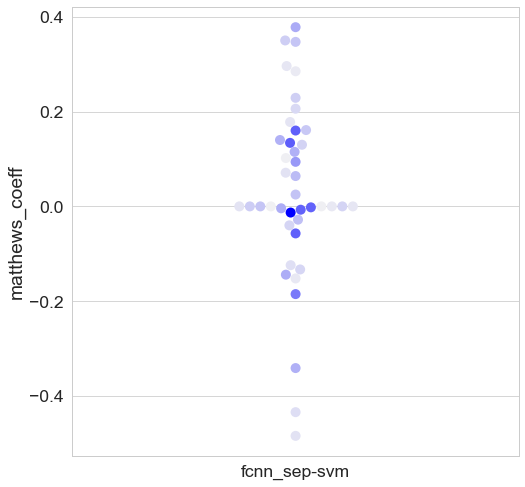

In [21]:
import seaborn as sns
import matplotlib
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_fcn_svm = fcn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['fcnn_sep-svm']*svm.shape[0], y=d_fcn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_(fcnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))

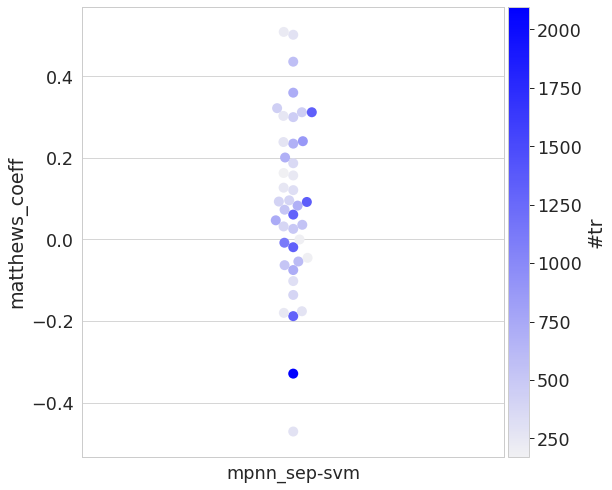

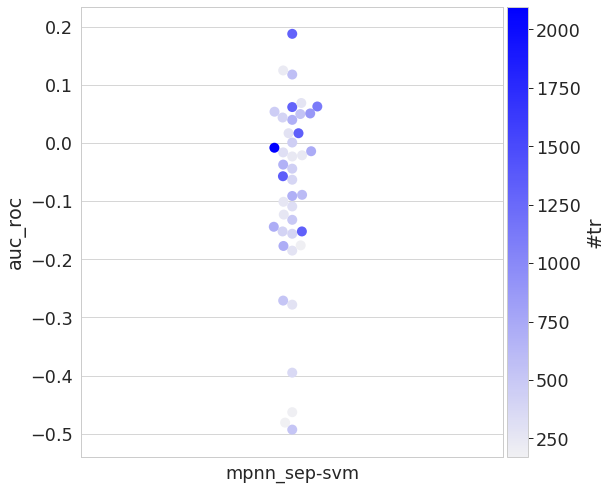

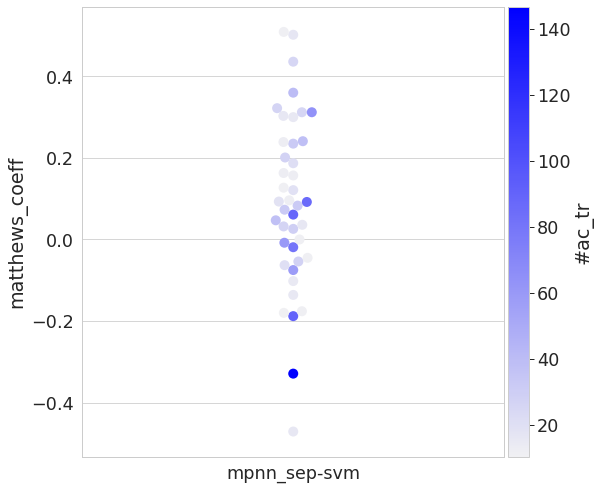

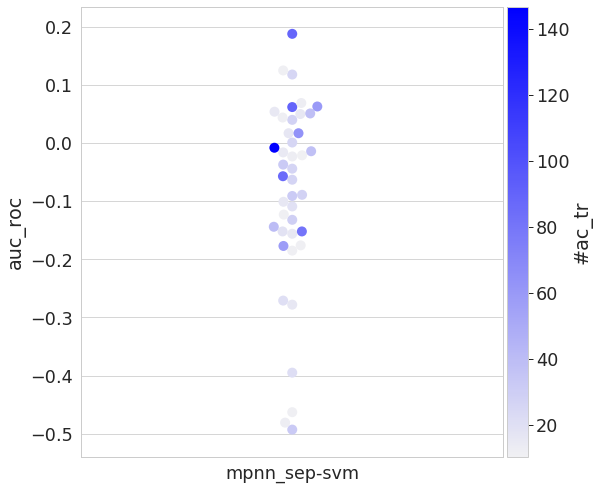

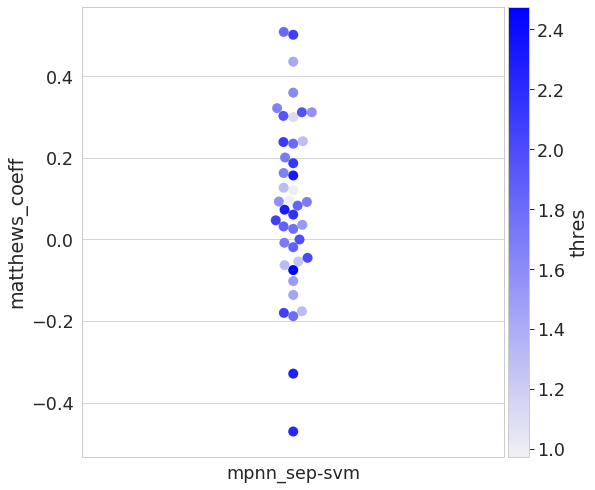

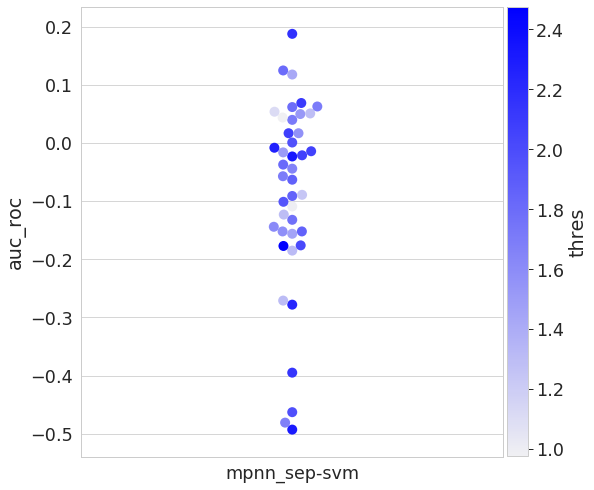

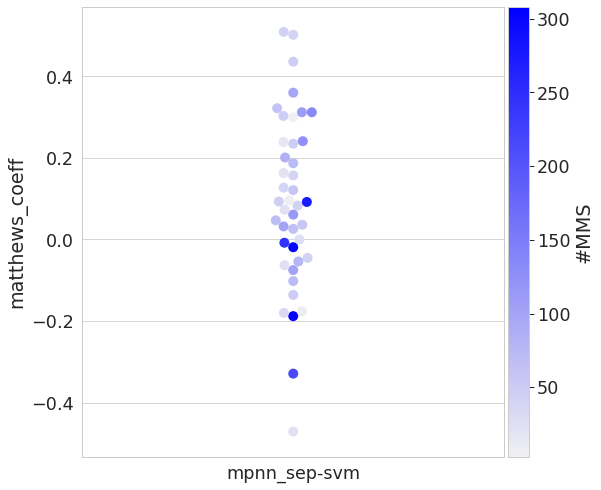

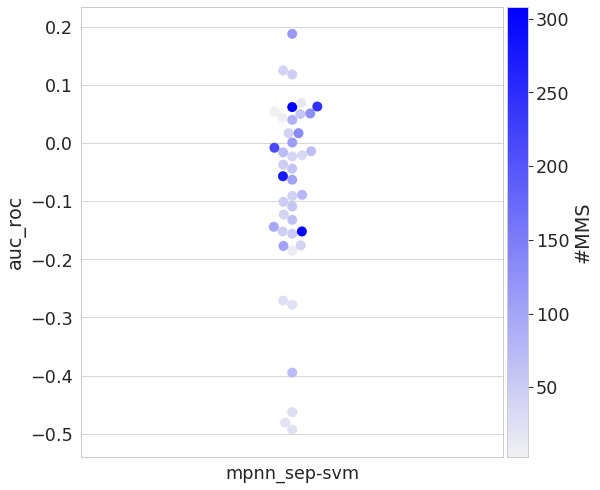

In [25]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_mpn_svm = mpn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['mpnn_sep-svm']*svm.shape[0], y=d_mpn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_(mpnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))